In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv('dataImages.csv', sep=',')

In [6]:
df.columns

Index(['Unnamed: 0', 'NameImage', 'label', 'bbox-0', 'bbox-1', 'bbox-2',
       'bbox-3', 'AOL', 'POL', 'COL', 'EGS', 'ECC', 'PESOVIVO', 'PESOABATE',
       'RC', 'FAMACHA', 'CC', 'AG', 'AC', 'AP', 'CT', 'CP', 'Profund'],
      dtype='object')

In [7]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('NameImage', axis=1)
df = df.drop('PESOABATE', axis=1)
df = df.drop('PESOVIVO', axis=1)
df = df.drop('RC', axis=1)
df = df.drop('AOL', axis=1)
df = df.drop('POL', axis=1)
df = df.drop('COL', axis=1)
df = df.drop('EGS', axis=1)
df = df.drop('ECC', axis=1)
df = df.drop('FAMACHA', axis=1)
df = df.drop('CC', axis=1)
df = df.drop('AG', axis=1)
df = df.drop('AC', axis=1)
df = df.drop('AP', axis=1)
df = df.drop('CT', axis=1)
# df = df.drop('CP', axis=1)
df = df.drop('Profund', axis=1)

df

,label,bbox-0,bbox-1,bbox-2,bbox-3,CP
0,255,490,950,904,1563,37
1,255,485,736,866,1312,40
2,255,513,577,1063,1318,41
3,255,387,643,812,1137,29
4,255,425,572,907,1183,34
5,255,438,1052,1043,1745,42
6,255,447,261,826,850,30
7,255,433,784,948,1412,37
8,255,500,539,927,1168,42
9,255,501,1017,936,1654,35


In [8]:
# Tratar os floats que foram inseridos com virgula ao inves de ponto.

def replaceFloat(nameColumns):
    aux = [float(str(x).replace(',', '.')) for x in df[nameColumns]]
    return aux

for x in df:
    df[x] = replaceFloat(x)

df

,label,bbox-0,bbox-1,bbox-2,bbox-3,CP
0,255.0,490.0,950.0,904.0,1563.0,37.0
1,255.0,485.0,736.0,866.0,1312.0,40.0
2,255.0,513.0,577.0,1063.0,1318.0,41.0
3,255.0,387.0,643.0,812.0,1137.0,29.0
4,255.0,425.0,572.0,907.0,1183.0,34.0
5,255.0,438.0,1052.0,1043.0,1745.0,42.0
6,255.0,447.0,261.0,826.0,850.0,30.0
7,255.0,433.0,784.0,948.0,1412.0,37.0
8,255.0,500.0,539.0,927.0,1168.0,42.0
9,255.0,501.0,1017.0,936.0,1654.0,35.0


### Ver os valores null

<AxesSubplot:>

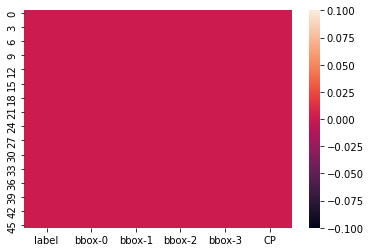

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum() #check for missing values

label     0
bbox-0    0
bbox-1    0
bbox-2    0
bbox-3    0
CP        0
dtype: int64

### Treinando o modelo

In [11]:
X = df.drop('CP', axis=1)
y = df['CP']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True)

In [1]:
# from pprint import pprint
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)


In [2]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation,
# # search across 100 different combinations, and use all available cores
# model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
#                                n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# # Fit the random search model
# model.fit(X_train, y_train)


In [13]:
# # # Fit the model
# # model = LinearRegression()
# # model = model.fit(X_train, y_train)

# Fit the model
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model = model.fit(X_train, y_train)


In [14]:
importance = model.feature_importances_

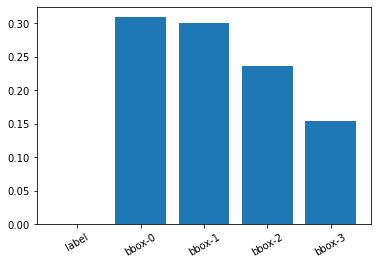

In [15]:
#histogram
plt.bar([x for x in range (len(importance))], importance)
plt.xticks([x for x in range (len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

In [16]:
y_test_predict = model.predict(X_test)

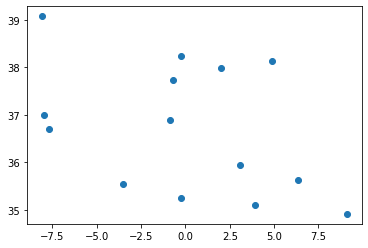

In [17]:
plt.scatter(y_test-y_test_predict,y_test_predict)
plt.show()

### Result

In [18]:
# model evaluation for training set
y_train_predict = model.predict(X_train)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)

print(f"RMSE for training is {rmse_train}")
print(f"R2 score for training is {r2_train}")

RMSE for training is 1.691177622250247
R2 score for training is 0.8260026311787073


In [19]:
# model evaluation for training set
y_test_predict = model.predict(X_test)

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)

print(f"RMSE for testing is {rmse_test}")
print(f"R2 score for testing is {r2_test}")

RMSE for testing is 5.1969111292876935
R2 score for testing is -0.1784384496883351


In [21]:
print(model.feature_importances_)


[0.         0.30921649 0.30058774 0.23640299 0.15379278]


In [22]:
coeff_df = pd.DataFrame(model.feature_importances_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
label,0.000000
bbox-0,0.309216
bbox-1,0.300588
bbox-2,0.236403
bbox-3,0.153793


In [23]:
y_pred = model.predict(X_test)

In [24]:
df_aux = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_aux

,Actual,Predicted
43,31.0,39.078
1,40.0,37.983
3,29.0,36.705
5,42.0,35.634
35,29.0,36.998
19,38.0,38.240
40,39.0,35.936
20,44.0,34.916
22,37.0,37.727
24,43.0,38.127


In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.195857142857143
Mean Squared Error: 27.00788528571429
Root Mean Squared Error: 5.1969111292876935
